# Assignment 3 - Supervised Learning

## *BINGYING(Echo) LIU*
Netid:  *bl199*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

### Find the cost function that we can use to choose the model parameters,  w , that best fit the training data.

**(a) Likelihood Function**

$P(Y|X) = \prod_{i=1}^{N} (P(y_i=1|x_i))^{y_i}  (P(y_i=0|x_i))^{1-y_i} = \prod_{i=1}^{N} (\sigma(\mathbf{w}^T \mathbf{x}_i))^{y_i}  (1-\sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_i}$

**(b) Cost Function of the Model Parameter $C(\mathbf{w})$**

$\begin{align*}
C(\mathbf{w}) &= -ln\{ \prod_{i=1}^{N} (\sigma(\mathbf{w}^T \mathbf{x}_i))^{y_i}  (1-\sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_i})\}\\
&= -\sum_{i=1}^{N} y_i \cdot ln(\sigma(\mathbf{w}^T \mathbf{x}_i)) + (1-y_i) \cdot ln((1-\sigma(\mathbf{w}^T \mathbf{x}_i))
\end{align*}$

**(c) Gradient of Function with respect to $\nabla_{\mathbf{w}}C(\mathbf{w})$**

Since we have

$\begin{align*}
ln[\sigma(\mathbf{w}^T \mathbf{x}_i)] &= ln(\frac{1}{1+e^{-\mathbf{w}^T \mathbf{x}_i}}) \\
&= -ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})
\end{align*}$ 

 
$\begin{align*}
ln[(1-\sigma(\mathbf{w}^T \mathbf{x}_i)] &= ln(1-\frac{1}{1+e^{-\mathbf{w}^T \mathbf{x}_i}}) \\
&= ln(\frac{e^{-\mathbf{w}^T \mathbf{x}_i}}{1+e^{-\mathbf{w}^T \mathbf{x}_i}})\\
&= ln(e^{-\mathbf{w}^T \mathbf{x}_i}) - ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})\\
&= -\mathbf{w}^T \mathbf{x}_i - ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})
\end{align*}$

We can simplify cost function $C(\mathbf{w})$ as following:

$\begin{align*}
C(\mathbf{w}) &= -\sum_{i=1}^{N} -y_i \cdot ln(1+e^{-\mathbf{w}^T \mathbf{x}_i}) + (1-y_i) \cdot (-\mathbf{w}^T \mathbf{x}_i - ln(1+e^{-\mathbf{w}^T \mathbf{x}_i}))\\
&= -\sum_{i=1}^{N} (1-y_i) \cdot (-\mathbf{w}^T \mathbf{x}_i) - ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})\\
&= -\sum_{i=1}^{N} y_i \cdot \mathbf{w}^T \mathbf{x}_i - \mathbf{w}^T \mathbf{x}_i - ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})\\
&= -\sum_{i=1}^{N} \{ y_i \cdot \mathbf{w}^T \mathbf{x}_i - [
ln(e^{\mathbf{w}^T \mathbf{x}_i}) + ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})] \}\\
&= -\sum_{i=1}^{N} \{ y_i \cdot \mathbf{w}^T \mathbf{x}_i - ln(1+e^{\mathbf{w}^T \mathbf{x}_i}) \}
\end{align*}$ 

Since we also have

$\begin{align*}
\frac{\partial}{\partial w_j} y_i \cdot \mathbf{w}^T \mathbf{x}_i &= y_i \cdot x_{ij}
\end{align*}$

$\begin{align*}
\frac{\partial}{\partial w_j} ln(1+e^{-\mathbf{w}^T \mathbf{x}_i}) &= \frac{ e^{\mathbf{w}^T \mathbf{x}_i} \cdot x_{ij}} {1+e^{\mathbf{w}^T \mathbf{x}_i}}\\
&= \sigma(\mathbf{w}^T \mathbf{x}_i) \cdot x_{ij}
\end{align*}$

Therefore:

$\begin{align*}
\frac{\partial C(\mathbf{w})}{\partial w_j} &= -\sum_{i=1}^{N} y_i \cdot x_{ij} - \sigma(\mathbf{w}^T \mathbf{x}_i) \cdot x_{ij}\\
&= \sum_{i=1}^{N} [\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i] \cdot x_{ij}
\end{align*}$

$\begin{align*}
\frac{\partial C}{\partial w_0} &= \sum_{i=1}^{N} \sigma(\mathbf{w}^T \mathbf{x}_i \cdot x_{ij} - y_i)  &\text{since $x_{i1}$ = 0}\\
\frac{\partial C}{\partial w_1} &= \sum_{i=1}^{N} [\sigma(\mathbf{w}^T \mathbf{x}_i \cdot x_{ij} - y_i] \cdot x_{i1} \\
\frac{\partial C}{\partial w_2} &= \sum_{i=1}^{N} [\sigma(\mathbf{w}^T \mathbf{x}_i \cdot x_{ij} - y_i] \cdot x_{i2}
\end{align*}$

**(d) Gradient Descent Update Function**

$\begin{align*}
\mathbf{w} &= \mathbf{w} + \eta \cdot \nabla_{\mathbf{w}}C(\mathbf{w})\\
&= \mathbf{w} + \eta \cdot \sum_{i=1}^{N} [\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i] \cdot x_{ij}
\end{align*}$

### Prepare and plot your data

**(e)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [2]:
data = pd.read_csv('data/A3_Q1_data.csv')
data.head()

,x1,x2,y
0,2.553124,0.337757,0.0
1,-0.877757,0.045790,1.0
2,-0.903528,0.368076,1.0
3,-1.532152,-0.863737,1.0
4,-0.046954,-0.388761,1.0


In [3]:
scatter_x1 = data.values[:,0]
scatter_x2 = data.values[:,1]
group = data.values[:,2]

Text(0.5,1,'Scatterplot for Random Samples')

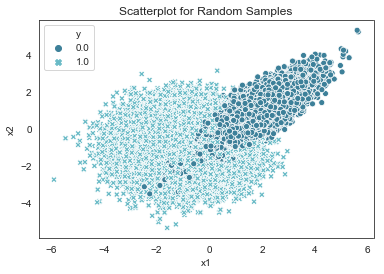

In [4]:
sns.scatterplot(x='x1', y='x2', hue = 'y',style = 'y', palette='GnBu_d',data = data).set_title('Scatterplot for Random Samples')

Data doesn't appear to be linearly separable. Since this is a classfication problem, logistic regression is a linear model designed for binary classification and is perferred over linear models.

**(f)**

In [5]:
print('Mean of x1 is %.2f' % scatter_x1.mean(axis = 0))
print('Maximum value in x1 is %.2f' % max(scatter_x1))
print('Minimum value in x1 is %.2f' % min(scatter_x1))
print('Standard deviation of x1 is %.2f' % scatter_x1.std(axis = 0))

Mean of x1 is 0.05
Maximum value in x1 is 5.63
Minimum value in x1 is -5.89
Standard deviation of x1 is 1.45


In [6]:
print('Mean of x1 is %.2f' % scatter_x2.mean(axis = 0))
print('Maximum value in x1 is %.2f' % max(scatter_x2))
print('Minimum value in x1 is %.2f' % min(scatter_x2))
print('Standard deviation of x1 is %.2f' % scatter_x2.std(axis = 0))

Mean of x1 is -0.40
Maximum value in x1 is 5.32
Minimum value in x1 is -5.35
Standard deviation of x1 is 1.16


In [20]:
if_null = pd.isna(data)
if_null.sum(axis=0)

x1    0
x2    0
y     0
dtype: int64

Data doesn't require any preprocessing since mean, standard deviation, max and min value of the two features are very similar and no particular outliers are shown both in calculation and on the graph. And there is no missing value in the dataset.

### Implement gradient descent and your logistic regression algorithm

**(g) Create a function to implement your logistic regression**

In [7]:
def sigmoid(weight, X):
    """
    sigmoid function that takes in weighted sum of inputs and returns a probability
    """
    return 1 / (1 + np.exp(-np.dot(X, weight.T)))

**(h) Cost function**

In [8]:
def cost_function(weight, X, y):
    """
    cost_function that takes weight, predictors and labels and returns average cost
    """
    total_cost = np.mean(-y * np.log(sigmoid(weight, X)) - (1-y)*np.log(1-sigmoid(weight,X)))
    return total_cost

**(i) Run gradient descent on training data**

In [9]:
def log_gradient(weight, X, y): 
    ''' 
    logistic gradient function: calculate gradient for cost function
    '''
    first_calc = sigmoid(weight, X) - y 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc/len(X)

In [10]:
def grad_desc(X, y, weight, lr, converge_change=1e-6): 
    ''' 
    gradient descent function: learning rate = 0.01, stopping criteria is changes less than 1e-6
    '''
    w_list = []
    cost = cost_function(weight, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        weight = weight - (lr * log_gradient(weight, X, y)) 
        w_list.append(weight)
        cost = cost_function(weight, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return w_list, num_iter  

In [11]:
def pred_values(weight, X): 
    ''' 
    pre_values is a function to predict probabilities of labels 
    '''
    pred_prob = sigmoid(weight, X) 
    #pred_value = np.where(pred_prob >= .5, 1, 0) 
    return pred_prob

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.values[:,0:2]

In [14]:
X = np.c_[np.ones(X.shape[0]), X]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, group, test_size=0.3, random_state=123)
X_train.shape

(70000, 3)

In [16]:
weight = np.zeros(X_train.shape[1])
weight

array([0., 0., 0.])

In [17]:
#weight values after running gradient descent 
w_list, num_iter = grad_desc(X_train, y_train, weight, lr = 1) 

In [18]:
best_weight = w_list[-1]

**(j) Cost function for both the training and the test data**

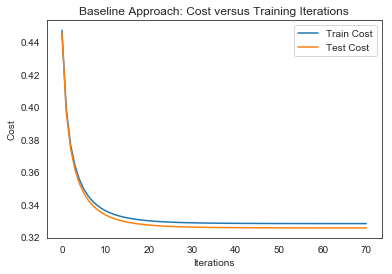

Lowest Train Cost: 0.328198
Lowest Test Cost: 0.325544


In [19]:
train_cost_arr = []
test_cost_arr = []
for w in w_list:
    # Calculate initial cost
    curr_train_cost = cost_function(w, X_train, y_train)
    curr_test_cost = cost_function(w, X_test, y_test)
    train_cost_arr.append(curr_train_cost)
    test_cost_arr.append(curr_test_cost)
    
plt.plot(train_cost_arr,label='Train Cost')
plt.plot(test_cost_arr,label='Test Cost')
plt.legend()
plt.title("Baseline Approach: Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()
print("Lowest Train Cost: %f" %np.array(train_cost_arr).min())
print("Lowest Test Cost: %f" %np.array(test_cost_arr).min())

**(k) Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch")**

In [23]:
learning_rate = [0.05, 0.1, 0.5, 1, 2, 4]
color=['r','b','k','g','c','m']
legend = ['0.05','0.1','0.5','1','2','4']

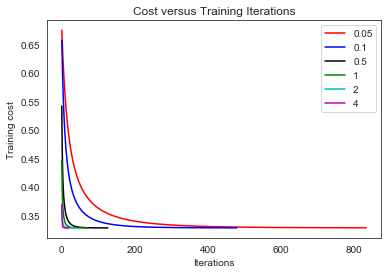

In [24]:
for lrate,c,le in zip(learning_rate,color,legend):
    weight = np.zeros(X_train.shape[1])
    w_list_lr1, num_iter = grad_desc(X_train, y_train, weight, lr = lrate) 
    
    train_cost_arr = []
    for w in w_list_lr1:
        # Calculate initial cost
        curr_train_cost = cost_function(w, X_train, y_train)
        train_cost_arr.append(curr_train_cost)
    
    plt.plot(train_cost_arr,c=c,label=le)
    
plt.legend()
plt.title("Cost versus Training Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training cost")

plt.show()

Learning rate has a large impact on how quickly the model converges because a high learning rate will converge more quickly than a lower learning rate. Also as we gradually decreases learning rate to 0.05, training cost increases significantly. I chose learning rate to be 1 in the rest of the problem because it has a good converging speed and appropriate training cost.

### Test your model performance through cross validation

**(I)**

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [53]:
skf = StratifiedKFold(n_splits=5)

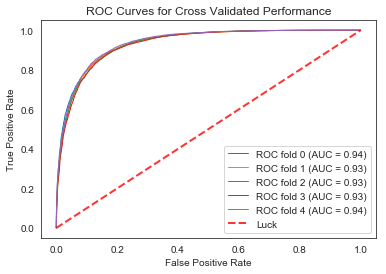

In [54]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train_index, test_index in skf.split(X, group):
    weight = np.zeros(X_train.shape[1])
    w_list, num_iter = grad_desc(X[train_index], group[train_index], weight, lr = 1) 
    weight = w_list[-1]
    pred = pred_values(weight, X[test_index])
    
    fpr, tpr, thresholds = roc_curve(group[test_index], pred)  #false positive rate, true positive rate and thresholds
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

# Draw the ROC curve for pure guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross Validated Performance')
plt.legend(loc="lower right")
plt.show()

**(m) Why do we use cross validation?**

We use cross-validation to approximate the test error rate we can expect when we deploy our model for testing. We use cross-validation to split our training set into k folds, then test on one fold which is held out from the training set and train on the remaining (k-1) folds. This hold-out dataset effectively acts as a test set from which we can approximate the test error.

**(n) Two plots--one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. **

In [64]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

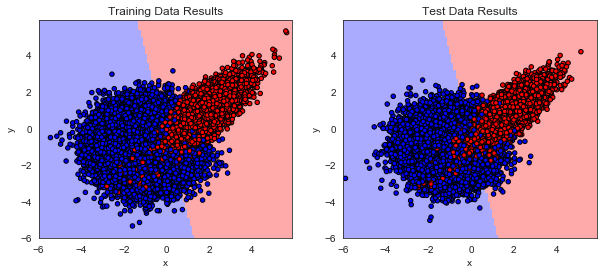

In [68]:
# Define the meshgrid for the entire sample
h = .1 # step size in the mesh
x_min, x_max = -6, 6
y_min, y_max = -6, 6

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
data_mesh = np.array(pred_values(best_weight, np.c_[np.ones(xx.ravel().shape[0]),xx.ravel(), yy.ravel()]))
# Apply binary threshold to the mesh to create distince decision line
data_mesh[data_mesh < .5] = 0
data_mesh[data_mesh >= .5] = 1
data_mesh = data_mesh.reshape(xx.shape)

fig, axes = plt.subplots(1, 2, figsize = (10,4))
plt.subplot(121)
plt.pcolormesh(xx, yy, data_mesh,cmap=cmap_light)
plt.scatter([x[1] for x in X_train], [x[2] for x in X_train], c=y_train,cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data Results")

plt.subplot(122)
plt.pcolormesh(xx, yy, data_mesh,cmap=cmap_light)
plt.scatter([x[1] for x in X_test], [x[2] for x in X_test], c=y_test,cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Data Results")
plt.show()

From both plots above, we see that decision boundaries appear to be fairly linear. There is a significant overlap between two classes around (0,0) point, which is where loss in the model comes from as we are trying to separate non-linearly separable data with a linear decision boundary. We could improve this by using a more flexible model capable of modeling a nonlinear decision boundary, such as a more flexible version of logistic regression or QDA or even KNN.

**(o) Compare trained model to random guessing**

In [69]:
import sklearn.linear_model

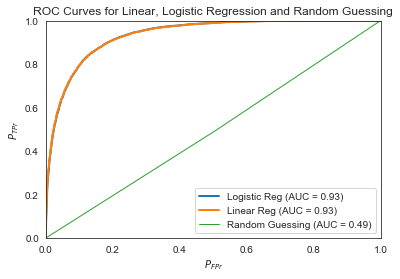

In [71]:
# Predict with my model
my_model_preds = pred_values(best_weight,X_test)
fpr, tpr, thresholds = roc_curve(y_test, my_model_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='Logistic Reg (AUC = %0.2f)' % (roc_auc))

# Predict with linear regression
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_preds = lin_reg.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, lin_reg_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='Linear Reg (AUC = %0.2f)' % (roc_auc))

# Predict with random guessing
random_preds = np.random.randint(2, size=len(lin_reg_preds))
fpr, tpr, thresholds = roc_curve(y_test, random_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Random Guessing (AUC = %0.2f)' % (roc_auc))

plt.title("ROC Curves for Linear, Logistic Regression and Random Guessing")
plt.xlabel("$P_{FPr}$")
plt.ylabel("$P_{TPr}$")
plt.xlim(fpr.min(), fpr.max())
plt.ylim(tpr.min(), tpr.max())
plt.legend()
plt.show()

From plots above, we can see that logistic and linear regression produce identical ROC curves, and random guessing produces a ROC curve as a straight line with slope 1. Therefore, logistic regression and linear regression perform very similarly on this task, across all possible thresholds of classification. We also see that the random guessing gives a probability of detection that equals the probability of false alarm for all threshold values which yields the worst performance.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

**(a) Construct your dataset from MNIST**

In [39]:
from mnist import MNIST
mndata = MNIST('./python-mnist/data') #MNIST()
x_train, y_train = mndata.load_training()
x_test,  y_test = mndata.load_testing()
# transform label to binary
x_train = np.array(train_img)
x_test = np.array(x_test)
y_train = np.array([1 if train_label[i]==3 else 0 for i in range(len(y_train))])
y_test = np.array([1 if test_label[i]==3 else 0 for i in range(len(y_test))])

**(b) Plot 10 examples of each class 0 and 1 from the training set**

In [43]:
y_train = y_train.reshape(-1,1)

In [44]:
train = np.c_[x_train, y_train]
c1_ex = np.where(train[:,-1] == 1)[0][:10]
c0_ex = np.where(train[:,-1] == 0)[0][:10]

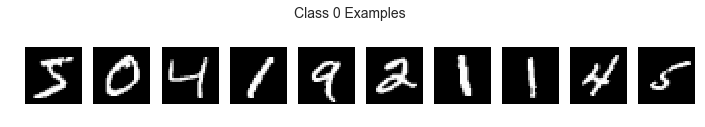

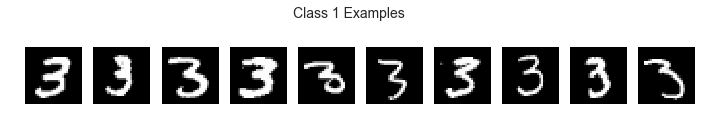

In [47]:
# Plot the class 0 examples
plt.figure(figsize=(12, 2))
plt.suptitle("Class 0 Examples", fontsize=14)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis("off")
    plt.imshow(x_train[c0_ex[i]].reshape((28,28)), cmap='gray')

# Plot the class 1 examples
plt.figure(figsize=(12, 2))
plt.suptitle("Class 1 Examples", fontsize=14)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis("off")
    plt.imshow(x_train[c1_ex[i]].reshape((28,28)), cmap='gray')

plt.show()

**(c) How many examples are present in each class? Are the classes balanced? What issues might this cause?**

In [48]:
#size of class 1 examples
np.where(train[:,-1] == 1)[0].size

6131

In [49]:
#size of class 0 examples
np.where(train[:,-1] == 0)[0].size

53869

Since class 1 has only 6131 examples while class 0 has 53869 examples, the classes are highly imbalanced. This might lead to overfitting to class 0 due to algorithm's default choice to minimize error rate. We can't use threshold=0.5 to get predictions. Therefore, we need to use ROC to choose the best threshold.

**(d) Cross-validation, train and test a perceptron classifier**

In [55]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn import metrics
from scipy import interp
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score

In [59]:
skf = StratifiedKFold(n_splits=5)

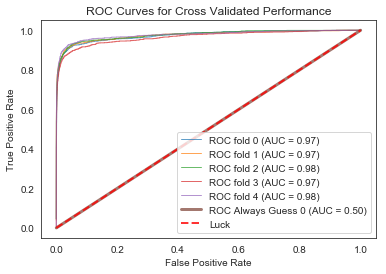

In [60]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

# Draw ROC curve for cross-validated performance and compute AUC
y_train = np.ravel(y_train)
for train_index, test_index in skf.split(x_train, y_train):
    classifier = Perceptron(tol = 1e-3)
    clf_isotonic = CalibratedClassifierCV(classifier, cv=10, method='isotonic')
    pred = clf_isotonic.fit(x_train[train_index], y_train[train_index]).predict_proba(x_train[test_index])
    
    fpr, tpr, thresholds = roc_curve(y_train[test_index], pred[:,1])  #false positive rate, true positive rate and thresholds
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

# Compute the ROC curve for the always guess 0 case
fpr1, tpr1, thresholds1 = roc_curve(y_train[test_index], np.zeros(len(y_train[test_index])))
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1, tpr1, lw=3, alpha=0.8,label='ROC Always Guess 0 (AUC = %0.2f)' % (roc_auc1))

# Draw the ROC curve for pure guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross Validated Performance')
plt.legend(loc="lower right")
plt.show()

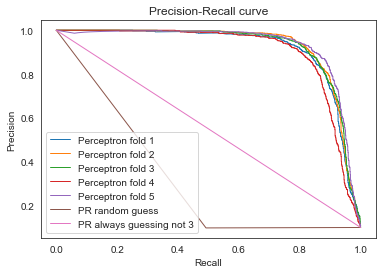

In [80]:
i=0
#Precision-recall curves
for train_index, test_index in skf.split(x_train, y_train):
    i += 1
    classifier = Perceptron(tol = 1e-3)
    clf_isotonic = CalibratedClassifierCV(classifier, cv=10, method='isotonic')
    pred = clf_isotonic.fit(x_train[train_index], y_train[train_index]).predict_proba(x_train[test_index])
    
    precision, recall, _ = precision_recall_curve(y_train[test_index], pred[:,1])
    plt.plot(recall,precision,lw=1, label='Perceptron fold %d' % (i))
    
# Random guessing preds    
precision, recall, _ = precision_recall_curve(y_train[test_index], np.random.randint(2, size=len(y_train[test_index])))
plt.plot(recall,precision,lw=1, label='PR random guess')

# Always guess zero preds
precision, recall, _ = precision_recall_curve(y_train[test_index], np.zeros((y_train[test_index].shape[0],1)))
plt.plot(recall,precision,lw=1, label='PR always guessing not 3')
    
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

**(e) Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient**

In [108]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [67]:
def cost_function3(X, y, w):
    return -np.mean(y*np.log(1/(1+np.exp(-(np.dot(X,w)))))+(1-y)*np.log(1-1/(1+np.exp(-(np.dot(X,w))))))

In [77]:
C = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20]
num_nonzero_coef = []
auc_ = []
#cost_train = []
cost_test = []
f1 = []
for c in C:
    print(c,)
    lr_classifier = LogisticRegression(penalty='l1', C=c, random_state=0).fit(x_train,y_train)
    lr_predict = lr_classifier.predict_proba(x_test)
    num_nonzero_coef.append((lr_classifier.coef_!=0).sum())
    fpr,tpr,_=roc_curve(y_test,lr_predict[:,1])
    auc_.append(auc(fpr,tpr))
    f1.append(f1_score(y_test,lr_classifier.predict(x_test)))
    cost_test.append(cost_function3(x_test,y_test.reshape(y_test.shape[0],1),lr_classifier.coef_.T))

0.0001
0.001
0.01
0.1
0.5
1
5
10
20


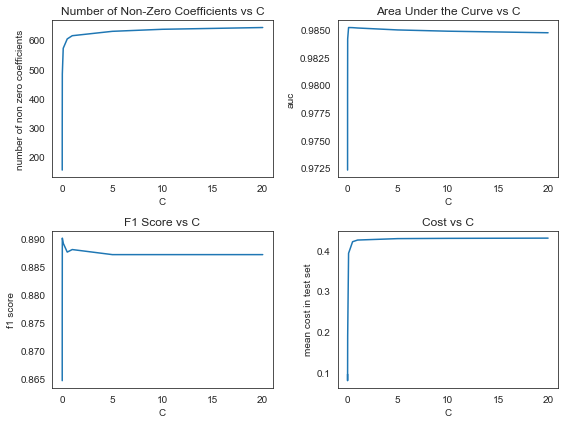

In [79]:
plt.figure(figsize=(8,6))
ax=plt.subplot(2,2,1)
ax.plot(C,num_nonzero_coef)
ax.set_ylabel('number of non zero coefficients')
ax.set_xlabel('C')
plt.title("Number of Non-Zero Coefficients vs C")

ax=plt.subplot(2,2,2)
ax.plot(C, auc_)
ax.set_ylabel('auc')
ax.set_xlabel('C')
plt.title("Area Under the Curve vs C")

ax=plt.subplot(2,2,3)
ax.plot(C, f1)
ax.set_ylabel('f1 score')
ax.set_xlabel('C')
plt.title("F1 Score vs C")

ax=plt.subplot(2,2,4)
ax.plot(C,cost_test,label='test')
ax.set_ylabel('mean cost in test set')
ax.set_xlabel('C')
plt.title("Cost vs C")

plt.tight_layout()
plt.show()

C is the inverse of regularization strength, so smaller values specify stronger regularization. 

In the first plot, we see that the number of non-zero coefficients in the model increases as C increases because at low values of C, the regularization is strong, forcing all of the coefficients closer to zero. 

$F_1$ score is a function of recall and precision and the higher the score, the better the model. From the F1 score vs c plot, we see as regularization strength decreases from 0.0001 to 2, the $F_1$ score decreases slightly(.890 to .887). As we further decrease the strength of the regularization, $F_1$ score stabilizes at 0.887. In the remaining plots, we see that performance of classfier is quite stable. And when regularization strength decreases to a certain level, penalty becomes large. Therefore, it's possible to find a suitable regularization strength through cross validation.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

## App Rating in Google Play Stores

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
import warnings
warnings.filterwarnings("ignore")

In [82]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

It's pretty rare to find a web-scraped dataset for **Google Play Store** (https://www.kaggle.com/lava18/google-play-store-apps) since Google deploys complicated techniques (dynamic page load) to prevent layman like me to scrape. Since one of my short-term goals is to build a sound meditation app and win parts of the Andriod market (Andriod is open source and dosen't have as high standard as ios platform), I'd like to know more about **what specific criterion current apps possess that contribute to their ratings in Google Play Store** and **given data such as number of reviews, number of installs, price and content type, can we predict an app's rating in Google Play store?**. Though without further experiments conducted I cannot infer causation from correlation, I'm still excited about what I'm going to unleash from this dataset!

First, let's take a look at the raw Google Play Store dataset.

### A. Data Cleasing

In [83]:
app_data = pd.read_csv('data/google-play-store-apps/googleplaystore.csv')

In [84]:
app_data.head(n=3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [85]:
app_data.shape

(10841, 13)

#### *A Brief Overview of All the Variables:*
**App**: Application name<br>
**Category**: Main category the app belongs to<br>
**Rating**: Overall user rating of the app (as when scraped), scored from 1 to 5<br>
**Size**: Size of the app (as when scraped)<br>
**Installs**: Number of user downloads/installs for the app (as when scraped),with various units, i.e. KB, MB<br>
**Type**: Paid or Free app<br>
**Price**: Price of the app (as when scraped)<br>
**Content Rating**: Age group the app is targeted at - Unrated/ Everyone/ Teen/ Everyone 10+ /Mature 17+ / Adults only 18+<br>
**Genres**: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.<br>
**Last Updated**: Date when the app was last updated on Play Store (as when scraped)<br>
**Current Ver**: Current version of the app available on Play Store (as when scraped)<br>
**Android Ver**: Min required Android version (as when scraped)

This raw dataset contains in total **10,841 records with 13 variables** (including both numerical and categorical). I chose 'Rating' as the response variable and we need to decide which remaining variables potentially (positively/negatively) contributes to rating. 
But before that, there are plenty of cleaning to do. Firstly, we want to remove any punctuation in numerical data such as 'Size' ,'Installs' and 'Price' and drop dulicated 'App' rows.

In [86]:
app_data.drop_duplicates(subset='App', inplace=True)

In [87]:
app_data = app_data[app_data['Installs'] != 'Free']
app_data = app_data[app_data['Installs'] != 'Paid']

In [88]:
#Remove '+' from 'Number of Installs' to make it numeric
app_data['Installs'] = app_data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
app_data['Installs'] = app_data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
app_data['Installs'] = app_data['Installs'].apply(lambda x: int(x))

In [89]:
#Size : Remove 'M', Replace 'k' and divide by 10^-3
app_data['Size'] = app_data['Size'].fillna(0)

app_data['Size'] = app_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

app_data['Size'] = app_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
app_data['Size'] = app_data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
app_data['Size'] = app_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


app_data['Size'] = app_data['Size'].apply(lambda x: float(x))

app_data['Price'] = app_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
app_data['Price'] = app_data['Price'].apply(lambda x: float(x))

app_data['Reviews'] = app_data['Reviews'].apply(lambda x: int(x))

**a) Drop Irrelevant/Repetitive Columns**

It seems that **'Category'** and **'Genres'** have  quite a lot overlapping. Let's explore those two cateogries.

**'Genres'** often includes multiple category labels for the same app, while **'Category'** only assigns one major label to each app. In order to have relatively balanced data points in each category (more meaningful than having highly unbalanced groups i.e. multilabel genre with only one data point), I decided to use 'Category' instead of 'Genres' column.

Moreover, I assume that app rating has no direct relationship with last updated, current version and andriod version. So I dropped those three columns as well.

In [90]:
app_data['Category'].value_counts().shape

(33,)

In [91]:
app_data['Genres'].value_counts().shape

(118,)

In [92]:
app_data = app_data.drop(['Genres','Last Updated', 'Current Ver','Android Ver'], axis =1)

**a) Check missing value in dataset**

Let's then check if there is any missing or erroneous value in this pre-processed dataset. We use pandas.isna function to get a boolean matrix showing whether each of the entry in original dataset is na/null (True) or contains value (False). We then use column sum to add up all boolean values, the result we have below shows that there are 1463 null-value entries in 'Rating' and 1227 null-value entries in 'Size'.

Since we want to use 'Rating' as a response variable in the following supervised learning models, 'Rating' with null value is tricky in supervised methods like regression. So does 'Size' in this dataset. Therefore I also decided to drop all rows with null values present in this dataset.

In [93]:
if_null = pd.isna(app_data)
if_null.sum(axis=0)

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
dtype: int64

In [94]:
app_data = app_data.dropna()

In [95]:
app_data.shape

(7027, 9)

After cleansing, size of this dataset shrinks from 10841 to 7027, but still it's a reasonable size to apply supervised learning models. Let's see if we can gain any insight from exploratory data anlysis. Specifically I'll delve into rating and see how each category perform in average rating as well as relationships between rating and each predictor.

### B. Exploratory Data Analysis

##### 1.Do Apps in general behave good or bad? How about in their own category?

Text(0,0.5,'Number of Apps')

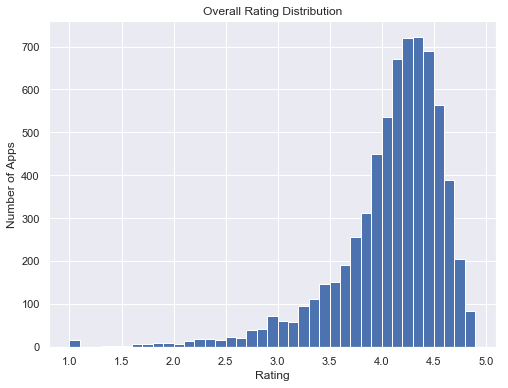

In [96]:
plt.figure(figsize=(8, 6))
plt.hist(app_data.Rating, bins = np.arange(1,5,0.1))
plt.title("Overall Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")

In [97]:
print('Average app rating = ', np.mean(app_data['Rating']))

Average app rating =  4.160623310089655


Most apps do well with an average rating of 4.16.  Let's break this down and inspect if we have categories which perform exceptionally good or bad.

In [98]:
groups = app_data.groupby('Category').filter(lambda x: len(x) >= 120).reset_index()
print('Average rating = ', np.nanmean(list(groups.Rating)))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': app_data.loc[app_data.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False,
    } for i,category in enumerate(list(set(groups.Category)))]

plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  4.156327260897853


Among the top 10 categories of apps with highest rating, Books and Reference & Health and Fitness produce the highest quality apps with 50% apps having a rating greater than 4.4. 50% of apps in Dating, on the contrary, has lower than average rating. Tools and finance category has some outliers with extremely low rating (junk apps).

##### 2. Scatterplots and Boxplots for numerical and categorical data

Exploratory plots will help us to determine if multiple regressions are possible and if transformations of some variables are needed. We observe positive relationship between size and rating, but since rating is capped at 5, the relationship doesn't seem to be completely linear. For other predictors such as reviews, number of installs and price, majority of data are crammed in the lower range. We might want to transform data before applying model. There seems to be some absurd apps which charge users over 250 dollars. We can treat them as outliers. And also it seems in general paid apps has higher rating than free apps.

[Text(0,0,'Everyone'),
 Text(0,0,'Teen'),
 Text(0,0,'Everyone 10+'),
 Text(0,0,'Mature 17+'),
 Text(0,0,'Adults only 18+'),
 Text(0,0,'Unrated')]

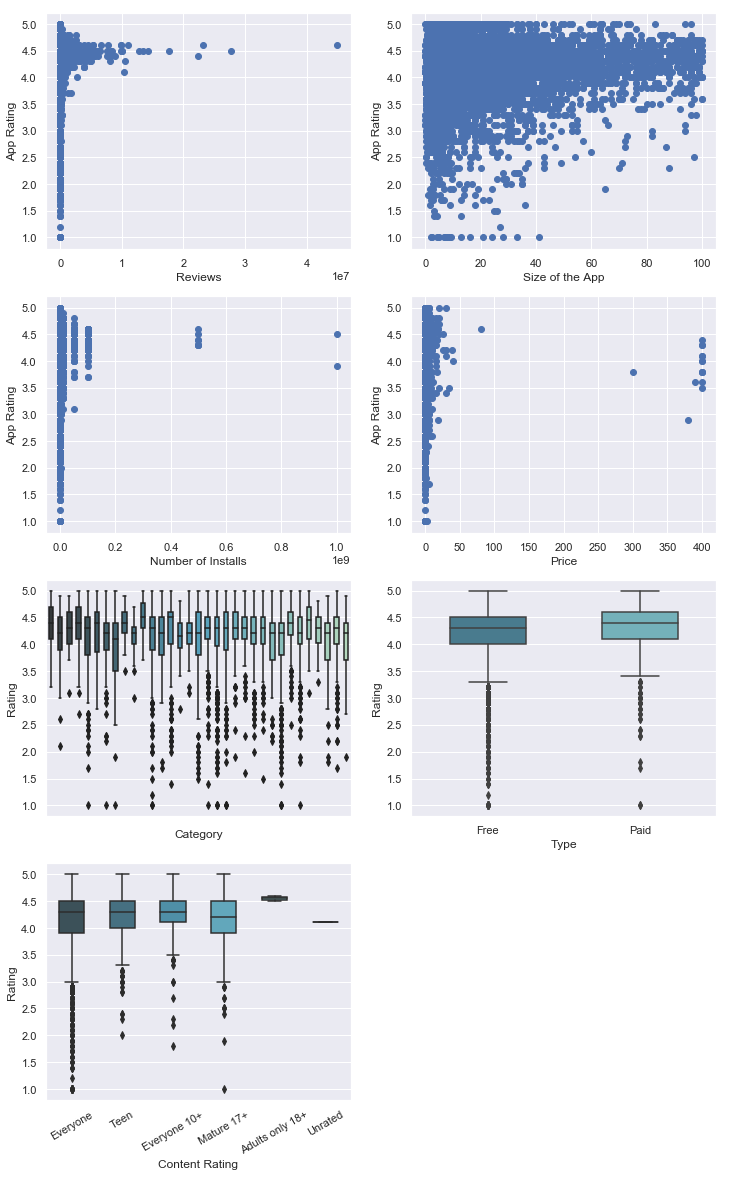

In [99]:
plt.figure(figsize=(12,20))
ax = plt.subplot(4,2,1)
ax.scatter(x = app_data.iloc[:, 3], y = app_data.iloc[:, 2])
ax.set_xlabel('Reviews')
ax.set_ylabel('App Rating')

ax = plt.subplot(4,2,2)
ax.scatter(x = app_data.iloc[:, 4], y = app_data.iloc[:, 2])
ax.set_xlabel('Size of the App')
ax.set_ylabel('App Rating')

ax = plt.subplot(4,2,3)
ax.scatter(x = app_data.iloc[:, 5], y = app_data.iloc[:, 2])
ax.set_xlabel('Number of Installs')
ax.set_ylabel('App Rating')

ax = plt.subplot(4,2,4)
ax.scatter(x = app_data.iloc[:, 7], y = app_data.iloc[:, 2])
ax.set_xlabel('Price')
ax.set_ylabel('App Rating')

ax = plt.subplot(4,2,5)
bplot1 = sns.boxplot(y='Rating', x='Category', 
                 data=app_data, 
                 width=0.5, palette="GnBu_d")
bplot1.set(xticklabels=[])

ax = plt.subplot(4,2,6)
bplot2 = sns.boxplot(y='Rating', x='Type', 
                 data=app_data, 
                 width=0.5, palette="GnBu_d")

ax = plt.subplot(4,2,7)
bplot3 = sns.boxplot(y='Rating', x='Content Rating', 
                 data=app_data, 
                 width=0.5, palette="GnBu_d")
bplot3.set_xticklabels(bplot3.get_xticklabels(),rotation=30)

### C. Learning Algorithms

As I mentioned above my **target variable is Rating**, which is a continuous variable from 1 to 5 with 5 as the highest rating. After cleaning the dataset and identifying non-repetitive (no significant multicolinearily problem) and related predictors for response, we identify **numerical predictors** as following: Reviews, Size,Installs and Price and **categorical predictors** as following: Category, Type and Content Rating.

The natural way to approach a prediction problem is to apply **multiple linear regression** where we predict rating of an app from all predictors. Linear regression has very strong interpretability, which is good in this case as I also want to figure out to what extent each predictors contribute to response variable.

From EDA plots above, variables **'Reviews', 'Installs' and 'Price'** all suffer from non-constant variance and possibly non-linearity problem. Before applying linear regression, I'll log transform the response variable as well as 'Reviews' and 'Installs'. Also boxplots of rating vs categories in content rating are highly imbalanced. Acatually 'Unrated' and 'Adults only 18+' have one and two data points respectively. Therefore, I decided to merge 'Unrated' with 'Everyone' and 'Adults only 18+' with 'Mature 17+'.

##### Step 1: Categorical Variables (Integer OR One-hot Encoding?)

**Firstly**, we deal with imbalanced category groups in 'Content Rating'.

In [100]:
app_data[app_data['Content Rating']=="Unrated"].index.tolist()
app_data = app_data.set_value(8266, 'Content Rating', 'Everyone')
app_data[app_data['Content Rating']=="Adults only 18+"].index.tolist()
app_data = app_data.set_value(298, 'Content Rating', 'Mature 17+')
app_data = app_data.set_value(3043, 'Content Rating', 'Mature 17+')

In [101]:
app_data['Content Rating'].value_counts()

Everyone        5683
Teen             779
Mature 17+       306
Everyone 10+     259
Name: Content Rating, dtype: int64

**Secondly**, 'Type' and 'Content Rating' are comparable to numerical labels since they have internal order. For instance, number of users gradually decreases from 'Everyone' to 'Mature 17+'.

In [102]:
app_data['Content Rating'] = app_data['Content Rating'].astype('category')
app_data['Content Rating'] = app_data['Content Rating'].cat.reorder_categories(['Everyone', 'Teen','Everyone 10+','Mature 17+'], ordered=True)
app_data['Content Rating'] = app_data['Content Rating'].cat.codes
app_data['Type'] = app_data['Type'].astype('category')
app_data['Type'] = app_data['Type'].cat.codes

In [103]:
app_data2 = app_data.copy()

**Thirdly**, integer encoding doesn't apply to 'Category' since there is no relationship between each subcategory. Thus, dummy/one-hot encoding might help provide better predictive accuracy.

In [104]:
app_data3 = app_data2.copy()

In [105]:
CategoryString = app_data["Category"]
categoryVal = app_data["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
app_data3["Category_c"] = app_data["Category"].map(category_dict).astype(int)

In [106]:
app_data3 = pd.get_dummies(app_data3, columns=['Category'])
app_data4 = app_data3.copy()

##### Step 2: Multiple Linear Regression with Transformation

**(1)** We first use MLR **without using "Category"** since application of dummy variables created by one-hot encoding would significantly increase the number of independent variables. I split the dataset into 30% test and 70% training and log-transformed the numerical predictors and response in the training set. Because magnitude of each predictors are different, I used 'normalize = True' in the regressor to standardized input variables. Finally, I used **root mean squared error and r-square** as performance meausures.

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
app_data2['Installs'] = np.log(app_data2['Installs'][app_data2.Installs!=0])
app_data2['Reviews'] = np.log10(app_data2['Reviews'][app_data2.Reviews!=0])
app_data2['Rating'] = np.log(app_data2['Rating'][app_data2.Rating!=0])

In [109]:
app_data3['Installs'] = np.log(app_data3['Installs'][app_data3.Installs!=0])
app_data3['Reviews'] = np.log10(app_data3['Reviews'][app_data3.Reviews!=0])
app_data3['Rating'] = np.log(app_data3['Rating'][app_data3.Rating!=0])

In [110]:
X2 = app_data2.drop(labels = ['App','Category','Rating'],axis = 1)
y2 = app_data2.Rating
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)
model = LinearRegression(normalize = True)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

In [111]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Root mean squared error is %.3f and R-square is %.3f' % (rmse, r2))

Root mean squared error is 0.027 and R-square is 0.092


In [112]:
coefficients = pd.DataFrame({"Feature":X2.columns,"Coefficients":np.transpose(model.coef_)})
coefficients

,Coefficients,Feature
0,0.097245,Reviews
1,-0.000034,Size
2,-0.035555,Installs
3,-0.015988,Type
4,-0.000225,Price
5,-0.008556,Content Rating


Multiple linear regression without "Category" has $R^2 = 0.097$, which means only 9.7% variance in response variable can be explained from independent variables. It's not very satisfying. But from coefficients of features, we can see that 'Reviews' amd 'Installs' contribute mostly to rating.1 unit increase in log10 Reviews contribute to 0.0974 increase in log Rating. Let's try multiple linear regression with "Category" this time.

**(2)** We then use MLR **with "Category" processed using one-hot-encoding**.

In [113]:
X3 = app_data3.drop(labels = ['App','Category_c','Rating'],axis = 1)
y3 = app_data3.Rating
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X3, y3, test_size=0.30)
model_n = LinearRegression(normalize = True)
model_n.fit(X_train_n,y_train_n)
y_predicted_n = model_n.predict(X_test_n)

In [114]:
rmse_n = mean_squared_error(y_test_n, y_predicted_n)
r2_n = r2_score(y_test_n, y_predicted_n)
print('Root mean squared error is %.3f and R-square is %.3f' % (rmse_n, r2_n))

Root mean squared error is 0.023 and R-square is 0.094


In [115]:
coefficients_n = pd.DataFrame({"Feature":X3.columns,"Coefficients":np.transpose(model_n.coef_)})
coefficients_n.sort_values('Coefficients', ascending = False).head(5)

,Coefficients,Feature
0,0.106559,Reviews
16,0.104250,Category_EVENTS
28,0.080283,Category_PARENTING
6,0.074538,Category_ART_AND_DESIGN
8,0.060905,Category_BEAUTY


In [116]:
coefficients_n.sort_values('Coefficients', ascending = False).tail(5)

,Coefficients,Feature
18,-0.035796,Category_FINANCE
35,-0.038402,Category_TOOLS
2,-0.039074,Installs
13,-0.045453,Category_DATING
37,-0.046418,Category_VIDEO_PLAYERS


Multiple linear regression with "Category" has $R^2 = 0.103$, which means only 10.3% variance in response variable can be explained by independent variables. It's not a big improvement compared to the case above. Root mean square error is bigger than the model above without using dummy encoded variables. But from coefficients of features, we can see that again 'Reviews' amd 'Installs' contribute quite a lot to rating. 1 unit increase in log10 Reviews contribute to 0.1014 increase in log Rating. In addition, whenever app is in the category "Art and Design", "Events" and "Parenting", rating will increase correspondingly. Apps in the category "Dating" contributes negatively in rating.

Let's plot actual ratings vs. predicted rating for case without 'category' and case with 'category'.

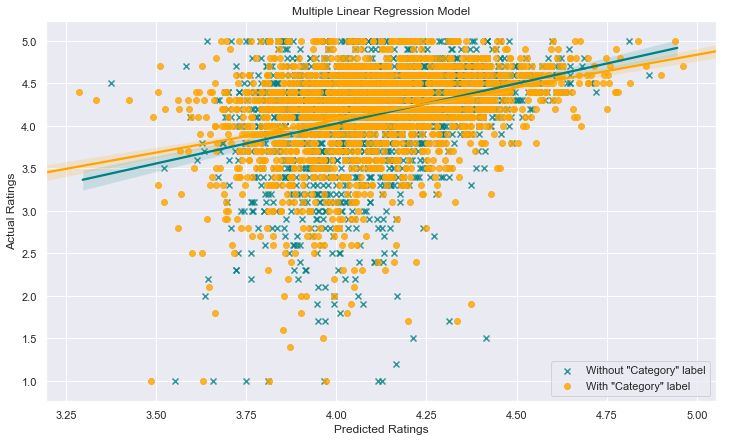

In [118]:
plt.figure(figsize=(12,7))
sns.regplot(np.exp(y_predicted),np.exp(y_test),color='teal', label = 'Without "Category" label', marker = 'x')
sns.regplot(np.exp(y_predicted_n),np.exp(y_test_n),color='orange',label = 'With "Category" label')
plt.legend()
plt.title('Multiple Linear Regression Model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')

plt.show()

Overall, linear regression is not particularly good at predicting 'rating'. One reason is that data collected doesn't contribute significantly to rating and we might need to web scrape relevant data to improve prediction accuracy. Also, rating is capped at 5 and data is always crammed at lower end of number of installs, reviews and price, which aggrevate the imbalanced situation. However, this is due to nature of data itself and we can only transform data to get some meaningful insights. The other reason is that linear regression might not be a suitable model in this case; we might need to consider ensemble methods such as boosting and random forest for more accurate prediction. 

### D. Summary

This project focuses on prediction of Google Play Store App Rating using features, for instance number of reviews, number of installs, category of apps and etc. Number of reviews is positively correlated with App Rating, but one-hot-encoded categorical variable also provides some more information about the relationship between categories of app and app rating. It turns out that Art and design, parenting and beauty category contributes positively to rating while dating app contributes negatively to it. However, linear regression in this case is good at interpretability but not good at prediction accuracy. Also data itself is imbalanced in some predictors although I performed transformation to them. For future reference, we might use ensemble methods to get a more accurate prediction.